<img src = https://www.analyticsvidhya.com/wp-content/uploads/2016/04/dt.png height = 400, width = 400>

 - Let’s say we have a sample of 30 students with four variables,
     - Gender (Boy/ Girl)
     - Class( IX/ X) and 
     - Height (5 to 6 ft) 
     - Play Cricket (Yes or No)
 - 15 out of these 30 play cricket in leisure time Now, 
 - I want to create a model to predict who will play cricket during leisure period? 
 - In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three.
 - This is where decision tree helps, it will segregate the students based on all values of three variable and identify the variable, which creates the best homogeneous sets of students
 
<img src = https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Test.png>

 - Decision tree identifies the most significant variable and it’s value that gives best homogeneous sets of population
 - Now the question which arises is, how does it identify the variable and the split? 

**Steps to Calculate Gini for a split**

we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini

<img src = https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Decision_Tree_Algorithm1.png>

Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p^2+q^2)

**Split on Gender:**

 - Calculate, Gini for sub-node Female = (0.2)*(0.2)+(0.8)*(0.8)=0.68
 - Gini for sub-node Male = (0.65)*(0.65)+(0.35)*(0.35)=0.55
 - Calculate weighted Gini for Split Gender = (10/30)*0.68+(20/30)*0.55 = 0.59

**Similar for Split on Class:**

 - Gini for sub-node Class IX = (0.43)*(0.43)+(0.57)*(0.57)=0.51
 - Gini for sub-node Class X = (0.56)*(0.56)+(0.44)*(0.44)=0.51
 - Calculate weighted Gini for Split Class = (14/30)*0.51+(16/30)*0.51 = 0.51

Above, you can see that Gini score for Split on Gender is higher than Split on Class, hence, the node split will take place on Gender

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('Diabetes data.txt')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
zero_columns = ['Glucose','BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [15]:
for column in zero_columns:
    mean = df1[column].mean(skipna = True)
    df1[column] = df1[column].replace(0, mean)

In [22]:
X=df1[df1.columns[0:-1]] # independent variable
Y=df1[df1.columns[-1]] # dependent variable

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state = 98)

In [36]:
tree = DecisionTreeClassifier(criterion='gini') # Gini - Default, #entropy
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)

Accuracy on training set: 1.000
Accuracy on test set: 0.695


In [38]:
accuracy_score(y_test, predictions)

0.6948051948051948

# What is Random Forest ? How does it work?

Random Forest is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.

### How does it work?

Random Forest has multiple trees

Each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes

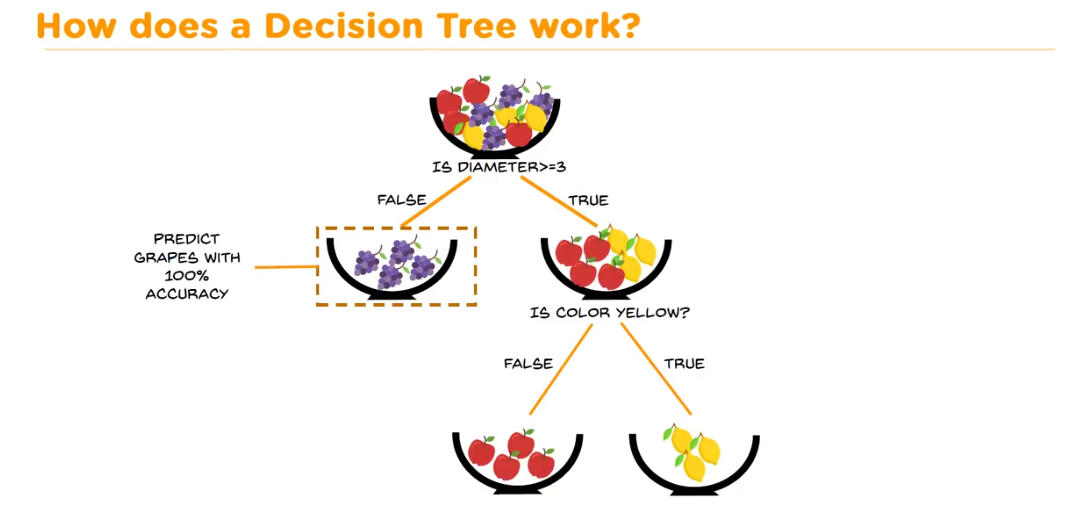

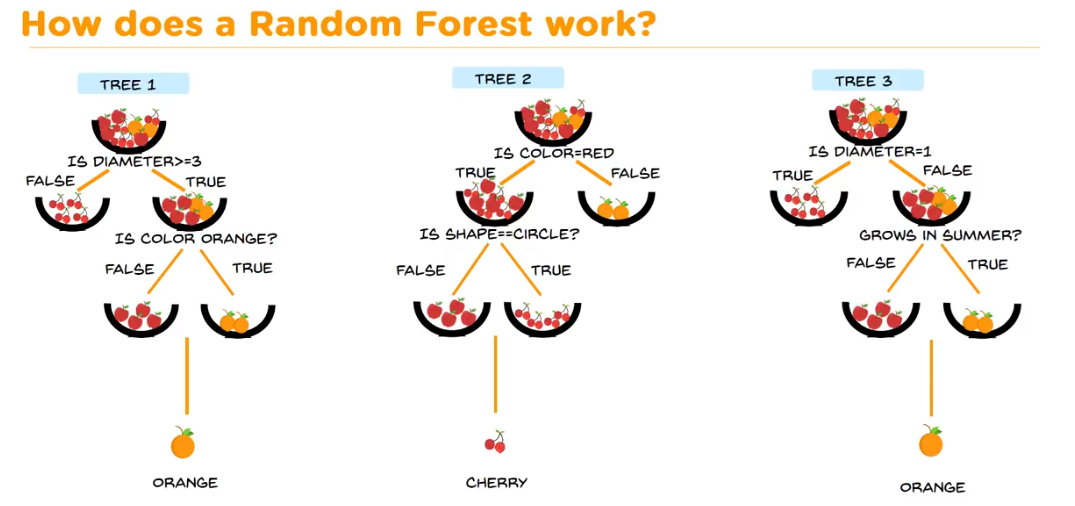

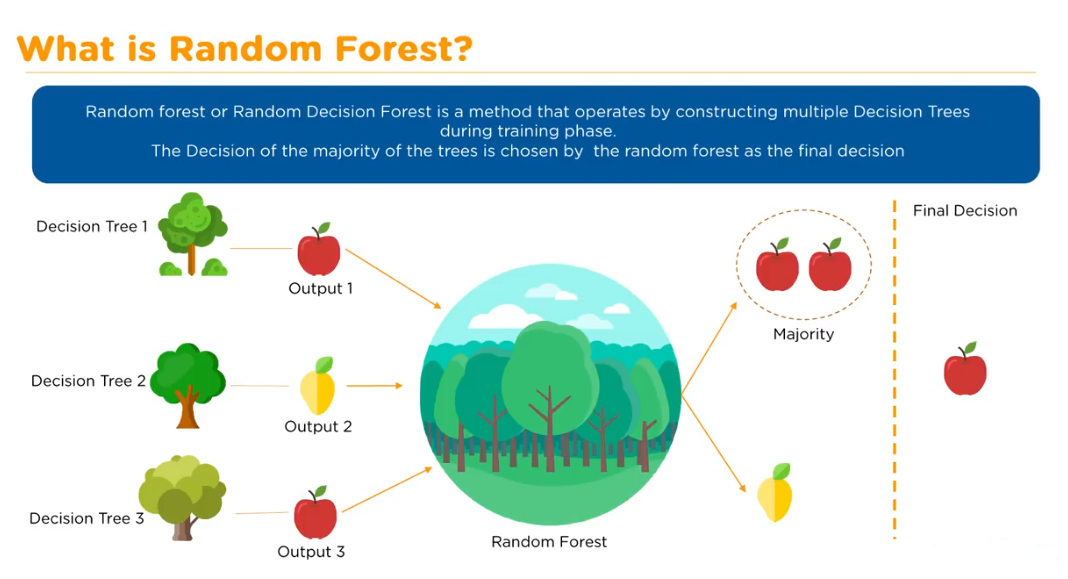

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
df = pd.read_csv('Diabetes data.txt')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
zero_columns = ['Glucose','BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [55]:
for column in zero_columns:
    mean = df1[column].mean(skipna = True)
    df1[column] = df1[column].replace(0, mean)

In [58]:
X=df1[df1.columns[0:-1]]

Y=df1[df1.columns[-1]]

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [60]:
tree = RandomForestClassifier()
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.734


In [61]:
predictions = tree.predict(X_test)

In [62]:
confusion_matrix(y_test, predictions)

array([[82, 16],
       [25, 31]], dtype=int64)

In [63]:
accuracy_score(y_test, predictions)

0.7337662337662337

In [58]:
tree.predict([[1,2,3,4,5,6,7,8]])

array([0], dtype=int64)

In [ ]:
# Decision Tree Classifier
# Random Forest Classifier

# Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
df = pd.read_csv(r"D:\Teachings\Python\Machine Learning\Algorithms\Linear Regression\1000_Companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [67]:
df['State'] = df['State'].astype('category')
df['State'] = df['State'].cat.codes
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [68]:
x = df.iloc[:,:-1] # independent variable
y = df.iloc[:,4] # dependent variable

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20)
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [70]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

In [71]:
y_pred

array([ 76376.20305, 117700.8395 , 146499.0017 , 141585.52   ,
       143338.9779 ,  58784.63514,  96581.04826,  89915.86699,
        77242.4545 ,  56789.0105 ,  96581.04826,  57143.54142,
       178847.5987 , 181550.5766 ,  71235.93187,  67226.74247,
        80539.1649 ,  65471.1737 ,  53649.48971,  80106.89347,
       147194.3948 , 168246.6971 , 101119.044  , 168802.8408 ,
        52325.33808, 177513.1956 , 145240.6305 , 175771.2955 ,
       134723.4494 , 111814.772  ,  98368.22581,  65868.41919,
       152894.2269 , 176344.525  ,  78406.85364, 142927.2094 ,
        85842.60573, 126117.3181 , 127075.833  ,  71772.42685,
       177513.1956 , 133834.1321 , 154901.8116 , 169324.8128 ,
       162440.0786 , 103282.38   , 175396.2616 ,  58666.74293,
       168876.3098 , 140589.8682 , 145680.5905 , 134268.9664 ,
       134979.7368 , 127455.1384 , 140872.6387 ,  95279.96251,
       131051.7051 , 120738.6997 ,  71498.49   , 139915.8323 ,
       163470.354  , 111461.9497 , 166402.282  , 181243

In [72]:
y_test

818     76356.55435
769    117637.62200
944    146690.36290
997    413956.48000
708    143415.86410
           ...     
276    162479.37600
94     155954.29850
603     60408.64304
570    113981.25490
451     68648.28331
Name: Profit, Length: 200, dtype: float64

In [73]:
from sklearn.metrics import mean_squared_error, r2_score# evaluation metrics
r2_score(y_test,y_pred)

0.6596157634836234

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [66]:
y_pred

array([138781.410327 ,  71275.0242478, 121294.108638 ,  92479.433079 ,
       182008.06673  ,  95123.4734158, 101011.924394 ,  52701.8670084,
        65810.3957175, 120553.096313 , 102998.657801 ,  53352.2561121,
       111682.2636057, 182955.877393 ,  85932.340498 , 169665.239362 ,
       128139.525339 ,  72618.6878842,  89803.8437635, 122057.665706 ,
        51205.3108417,  99005.3910485,  55854.5695142, 142852.75792  ,
       168409.020969 , 159465.00892  ,  53197.8771193,  68698.3630473,
       173366.764263 ,  86187.6369328,  49946.3475915, 175357.211907 ,
       114413.27001  , 142528.648342 , 105407.289244 , 161034.265282 ,
       178477.195061 ,  90537.7740234,  87054.1019525,  97929.0213126,
        91359.4314638,  80760.1700817,  63776.4561101, 151833.797508 ,
        87660.0166528, 109891.847552 , 144793.041572 , 141534.466774 ,
       155910.341872 , 164357.108489 , 101076.36364  , 133938.509394 ,
       171694.847696 ,  87039.3397969, 154328.103676 , 111224.166207 ,
      

In [67]:
y_test

513    138588.26360
894     71235.93187
312    121140.21660
375     92485.57543
605    182059.73430
           ...     
761    119961.29450
962    171416.97240
228     85830.64565
141     78689.62408
460     88027.88306
Name: Profit, Length: 200, dtype: float64

In [68]:
r2_score(y_test,y_pred)

0.9496925871728372